# Pymaceuticals

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_data = pd.merge(mouse_metadata, study_results, how ="right", on = ["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [32]:
# Checking the total number of mice in the merged data. 
number_of_mice = len(combined_data["Mouse ID"].unique())
number_of_mice


249

In [33]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice_ID = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

print(duplicate_mice_ID)


['g989']


In [34]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = pd.DataFrame(combined_data.loc[combined_data['Mouse ID'] == 'g989'])
duplicate_mice_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [35]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

combined_data_cleaned = combined_data.drop_duplicates(keep=False)
# combined_data_cleaned
# combined_data_cleaned = combined_data[combined_data['Mouse ID'].isin(duplicate_mice_rows)==False]


In [37]:
indexed = combined_data_cleaned[combined_data_cleaned['Mouse ID'] == 'g989' ].index
combined_data_cleaned.drop(indexed,inplace=True)
combined_data_cleaned.head()

C:\Users\tsube\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [38]:
# Checking the number of mice in the clean DataFrame.
total_mice_cleaned_data = len(combined_data_cleaned["Mouse ID"].value_counts())
total_mice_cleaned_data


248

In [39]:
# for conveniance some of the columns are renamed

combined_data_cleaned = combined_data_cleaned.rename(columns = {'Mouse ID': "Mouse_ID", 'Drug Regimen': "Drugs", 
                                           'Age_months':"Age", 'Weight (g)': "Weight", 'Timepoint':"Time_point",
                                           'Tumor Volume (mm3)': "Tumor_vol", 'Metastatic Sites': "Site"})

combined_data_cleaned.columns


Index(['Mouse_ID', 'Drugs', 'Sex', 'Age', 'Weight', 'Time_point', 'Tumor_vol',
       'Site'],
      dtype='object')

## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_vol_by_drugs = combined_data_cleaned.groupby("Drugs")["Tumor_vol"]

tumor_vol_mean = combined_data_cleaned.groupby("Drugs")["Tumor_vol"].mean()
tumor_vol_median = combined_data_cleaned.groupby("Drugs")["Tumor_vol"].median()
tumor_vol_variance = combined_data_cleaned.groupby("Drugs")["Tumor_vol"].var()
tumor_vol_std = combined_data_cleaned.groupby("Drugs")["Tumor_vol"].std()
tumor_vol_sem = combined_data_cleaned.groupby("Drugs")["Tumor_vol"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_vol_stats = pd.DataFrame({
    "Mean Tumer Vol": tumor_vol_mean,
    "Median Tumer Vol": tumor_vol_median,
    "Tumer Vol Variance": tumor_vol_variance,
    "Tumor Vol Std. Dev.": tumor_vol_std,
    "Tumor Vol Std. Err.": tumor_vol_sem
})

drug_vol_stats



,Mean Tumer Vol,Median Tumer Vol,Tumer Vol Variance,Tumor Vol Std. Dev.,Tumor Vol Std. Err.
Drugs,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

drugs_stats_agg = combined_data_cleaned.groupby("Drugs")["Tumor_vol"].aggregate(["mean", "median", "var", "std", "sem"])
drugs_stats_agg

,mean,median,var,std,sem
Drugs,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

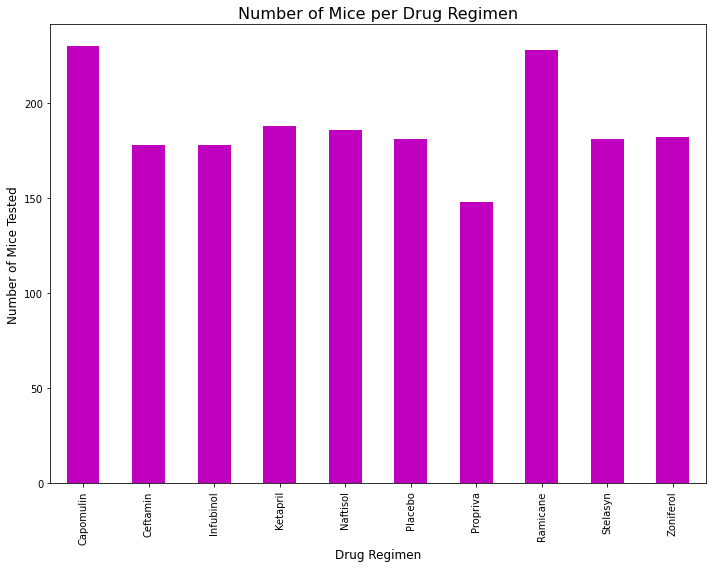

In [42]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

mice_counts_drugs = combined_data_cleaned.groupby(["Drugs"]).count()["Mouse_ID"]

bar_pandas = mice_counts_drugs.plot.bar(figsize=(10,8), color='m')

plt.xlabel("Drug Regimen",fontsize = 12)
plt.ylabel("Number of Mice Tested",fontsize = 12)
plt.title("Number of Mice per Drug Regimen",fontsize = 16)

plt.tight_layout()
plt.show()




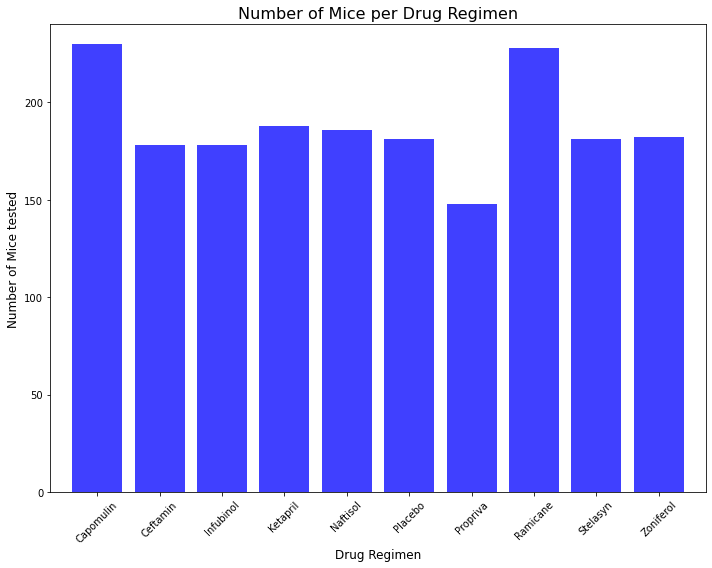

In [43]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

mice_counts_drugs_list =list(combined_data_cleaned.groupby(["Drugs"])["Mouse_ID"].count())
# mice_counts_drugs_list

x_axis = np.arange(len(mice_counts_drugs))
fig1, ax1 = plt.subplots(figsize=(10, 8))
plt.bar(x_axis, mice_counts_drugs_list, color='blue', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', \
                            'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation=45)

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mice_counts_drugs_list)+10)

plt.title("Number of Mice per Drug Regimen",fontsize = 16)
plt.xlabel("Drug Regimen",fontsize = 12)
plt.ylabel("Number of Mice tested",fontsize = 12)
plt.tight_layout()
plt.show()


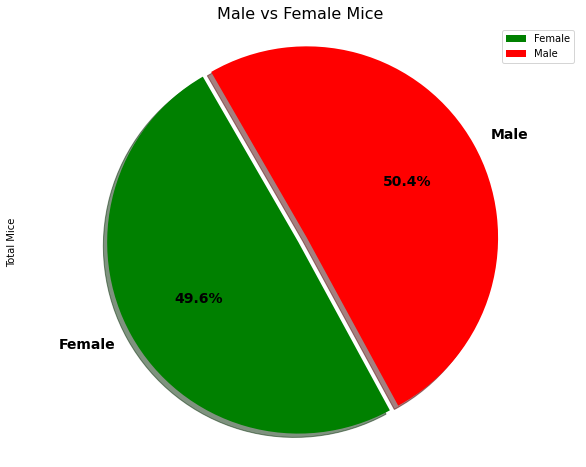

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mice_gender = combined_data_cleaned.groupby(["Mouse_ID","Sex"])
mice_gender = pd.DataFrame(mice_gender.size())

# Create the dataframe with total mice count by gender
mouse_gender = pd.DataFrame(mice_gender.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Mice"]

colors = ['green', 'red']
explode = (0.05, 0)
plot = mouse_gender.plot.pie(y="Total Mice",figsize=(10,8), colors = colors, 
                     startangle=120, explode = explode, shadow = True, autopct="%1.1f%%", 
                             textprops={"fontsize": 14, "weight": "bold"})

plt.title('Male vs Female Mice', fontsize = 16)
plt.axis("equal")
plt.show()


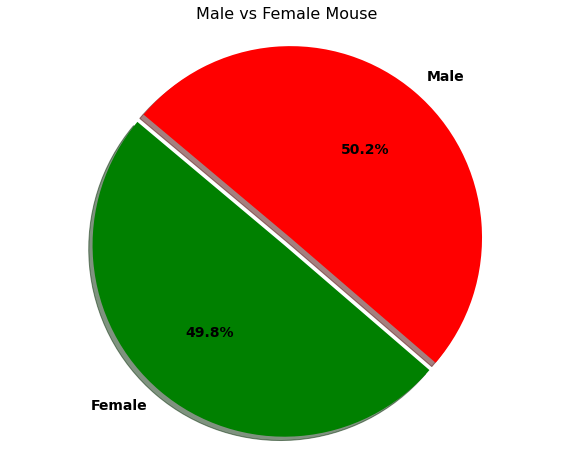

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.799197,50.200803]

#Set colors for each section of the pie
colors = ['green', 'red']

#Determoine which section of the circle to detach
explode = (0.05, 0)

#Create the pie chart based upon the values 
fig1, ax1 = plt.subplots(figsize=(10, 8))
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", 
        shadow=True, startangle=140, textprops={"fontsize": 14, "weight":"bold"})
plt.title('Male vs Female Mouse',fontsize = 16)
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [45]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

campomulin_df = combined_data_cleaned.loc[combined_data_cleaned["Drugs"] == "Capomulin", :]
ramicane_df = combined_data_cleaned.loc[combined_data_cleaned["Drugs"] == "Ramicane", :]
infubinol_df = combined_data_cleaned.loc[combined_data_cleaned["Drugs"] == "Infubinol", :]
ceftamin_df = combined_data_cleaned.loc[combined_data_cleaned["Drugs"] == "Ceftamin", :]

campomulin_df


,Mouse_ID,Drugs,Sex,Age,Weight,Time_point,Tumor_vol,Site
0,b128,Capomulin,Female,9,22,0,45.000000,0
226,j246,Capomulin,Female,21,21,0,45.000000,0
227,r554,Capomulin,Female,8,17,0,45.000000,0
228,s185,Capomulin,Female,3,17,0,45.000000,0
229,b742,Capomulin,Male,7,21,0,45.000000,0
...,...,...,...,...,...,...,...,...
1854,s710,Capomulin,Female,1,23,45,40.728578,1
1859,j119,Capomulin,Female,7,23,45,38.125164,1
1878,i557,Capomulin,Female,1,24,45,47.685963,1
1888,r944,Capomulin,Male,12,25,45,41.581521,2


In [46]:
# Start by getting the last (greatest) timepoint for each mouse

capomulin_last = campomulin_df.groupby('Mouse_ID').max()['Time_point']
capomulin_vol = pd.DataFrame(capomulin_last)

ramicane_last = ramicane_df.groupby('Mouse_ID').max()['Time_point']
ramicane_vol = pd.DataFrame(ramicane_last)

infubinol_last = infubinol_df.groupby('Mouse_ID').max()['Time_point']
infubinol_vol = pd.DataFrame(infubinol_last)

ceftamin_last = ceftamin_df.groupby('Mouse_ID').max()['Time_point']
ceftamin_vol = pd.DataFrame(ceftamin_last)


In [47]:
# Merge this grouped dataframe with the original dataframe to get the tumor volume at the last timepoint

capomulin_final = pd.merge(capomulin_vol, combined_data_cleaned, on= ("Mouse_ID", "Time_point"), how = "left")
ramicane_final = pd.merge(ramicane_vol, combined_data_cleaned, on= ("Mouse_ID", "Time_point"), how = "left")
infubinol_final = pd.merge(infubinol_vol, combined_data_cleaned, on= ("Mouse_ID", "Time_point"), how = "left")
ceftamin_final = pd.merge(ceftamin_vol, combined_data_cleaned, on= ("Mouse_ID", "Time_point"), how = "left")


In [48]:
# Put treatments into a list for for loop 
Regimens = ['capomulin', 'ramicane', 'infubinol','ceftamin']

# Create list to fill with tumor vol data 

capomulin_tumors = capomulin_final["Tumor_vol"]
ramicane_tumors = ramicane_final["Tumor_vol"]
infubinol_tumors = infubinol_final["Tumor_vol"]
ceftamin_tumors = ceftamin_final["Tumor_vol"]

Regimens_vol = pd.DataFrame({"capomulin": capomulin_tumors, "ramicane": ramicane_tumors, \
                             "infubinol": infubinol_tumors, "ceftamin": ceftamin_tumors})
Regimens_vol


,capomulin,ramicane,infubinol,ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


In [49]:
# Obtaining the quartiles and IQR 

bounds = pd.DataFrame()

for drugs in Regimens:
    quartiles = Regimens_vol[drugs].quantile([.25, .5, .75])
    lower_q = quartiles[.25]
    upper_q = quartiles[.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - (1.5*iqr)
    upper_bound = upper_q + (1.5*iqr)
    bounds[drugs]=(lower_bound, upper_bound)
    
    print(f" Regimen {drugs}: lower bound is {lower_bound}, upper bound is {upper_bound}")
    print()

# Getting the outliers using upper and lower 

all_tumors_data = [capomulin_final, ramicane_final, infubinol_final, ceftamin_final]
query_df = pd.DataFrame()

for i in range(len(all_tumors_data)):
    item = all_tumors_data[i]
    item["outlier"] = (item.Tumor_vol < bounds.iloc[0,i]) | (item.Tumor_vol > bounds.iloc[1,i])
    query_df = query_df.append(item[(item["outlier"]==True)])

# Locating the rows that has potential outlier data of Tumor Volume 
print(f"Potential outlier is as following: \n {query_df.to_string(index=False)}")


 Regimen capomulin: lower bound is 20.70456164999999, upper bound is 51.83201549

 Regimen ramicane: lower bound is 17.912664470000003, upper bound is 54.30681135

 Regimen infubinol: lower bound is 36.83290494999999, upper bound is 82.74144559000001

 Regimen ceftamin: lower bound is 25.355449580000002, upper bound is 87.66645829999999

Potential outlier is as following: 
 Mouse_ID  Time_point     Drugs    Sex  Age  Weight  Tumor_vol  Site  outlier
    c326           5 Infubinol Female   18      25  36.321346     0     True


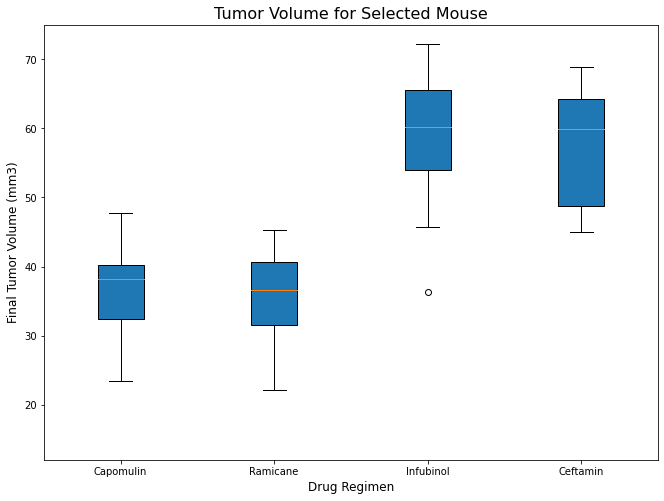

In [50]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

data_to_plot = [capomulin_tumors, ramicane_tumors, infubinol_tumors, ceftamin_tumors]
Regimens = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(11, 8))
ax1.set_title('Tumor Volume for Selected Mouse',fontsize = 16)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 12)
ax1.set_xlabel('Drug Regimen',fontsize = 12)
ax1.boxplot(data_to_plot, labels=Regimens, widths = 0.3, patch_artist=True, vert=True)

plt.ylim(12, 75)
plt.show()

## Line and Scatter Plots

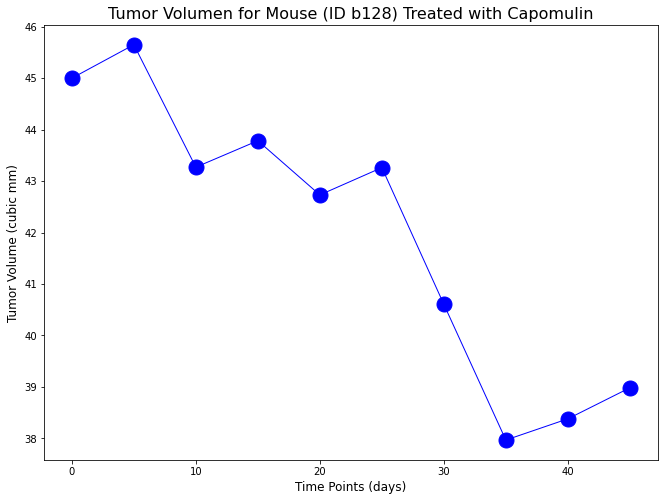

In [55]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Plotting a line graph for tumor volume for a mouse (ID b128) treated Capomulin 

campomulin_df = combined_data_cleaned.loc[combined_data_cleaned["Drugs"] == "Capomulin", :]

# choosing Mouse ID 'b128'

forline_df = campomulin_df.loc[campomulin_df["Mouse_ID"] == "b128",:]
# forline_df.head()

x_axis = forline_df.Time_point
tum_vol = list(forline_df.Tumor_vol)

fig1, ax1 = plt.subplots(figsize=(11, 8))

plt.title("Tumor Volumen for Mouse (ID b128) Treated with Capomulin", fontsize = 16)
plt.xlabel("Time Points (days)", fontsize = 12)
plt.ylabel("Tumor Volume (cubic mm)", fontsize = 12)
plt.plot(x_axis, tum_vol, markersize = 15, marker="o", color="Blue", linewidth=1)
plt.show()




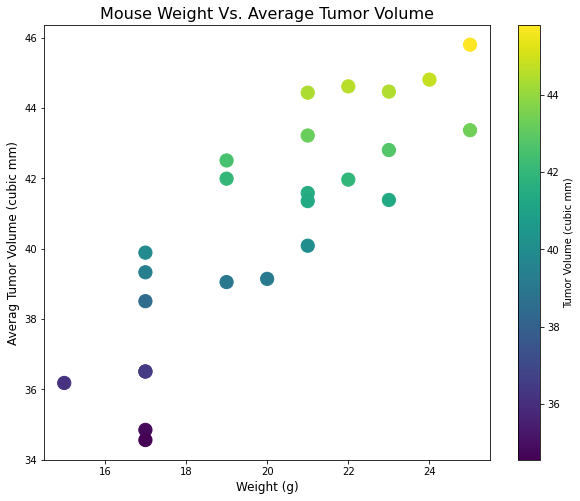

In [56]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Calculating average tumor volume for Capomulion by ages of the mouse

avg_capomulin_vol =campomulin_df.groupby(['Mouse_ID']).mean()

fig1, ax1 = plt.subplots(figsize=(10, 8))
plt.scatter(avg_capomulin_vol['Weight'],avg_capomulin_vol['Tumor_vol'],
            s=175, c=avg_capomulin_vol['Tumor_vol'])
clb= plt.colorbar()
plt.title('Mouse Weight Vs. Average Tumor Volume',fontsize =16)
plt.xlabel('Weight (g)',fontsize =12)
plt.ylabel('Averag Tumor Volume (cubic mm)',fontsize =12)
clb.set_label("Tumor Volume (cubic mm)")

plt.show()


## Correlation and Regression

The correlation between both factors is 0.84


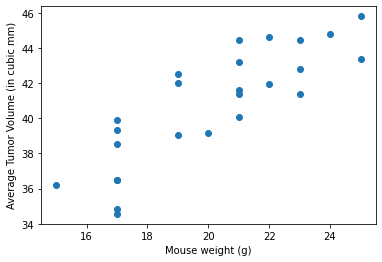

In [57]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(avg_capomulin_vol['Weight'],avg_capomulin_vol['Tumor_vol'])
plt.scatter(avg_capomulin_vol['Weight'],avg_capomulin_vol['Tumor_vol'])
plt.xlabel('Mouse weight (g)')
plt.ylabel('Average Tumor Volume (in cubic mm)')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()


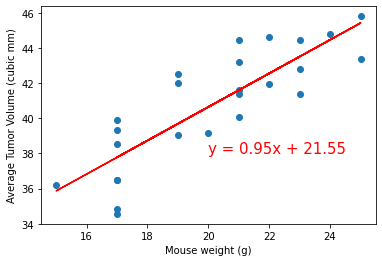

In [58]:
# Add the linear regression equation and line to plot
x_values = avg_capomulin_vol['Weight']
y_values = avg_capomulin_vol['Tumor_vol']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")
plt.xlabel('Mouse weight (g)')
plt.ylabel('Average Tumor Volume (cubic mm)')
plt.show()